# Exploration des données

## Import des bibliothèques

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

## Chargement des données

In [8]:
X_test_full = pd.read_csv('./datas/X_test.csv')
y_test_full = pd.read_csv('./datas/Y_test.csv')

#Import des datas train
X_train_full = pd.read_csv('./datas/X_train.csv')
Y_train_full = pd.read_csv('./datas/y_train.csv')

## Nos Y

Autocorrélation de 'spot_id_delta' avec elle-même: 0.7107856450514392
Valeurs de la fonction d'autocorrélation (ACF):
[1.         0.71074701 0.47685964 0.40240408 0.33960978 0.30442121
 0.27829575 0.25328681 0.23024765 0.22021387 0.18443277 0.16772724
 0.14697851 0.11911646 0.10465129 0.09486627 0.08327889 0.07451282
 0.0649726  0.0489283  0.03842826 0.03846234 0.04162649 0.05365476
 0.05918062 0.04662237 0.0372881  0.02444906 0.01198338 0.00770723
 0.00662887 0.00497258 0.00935978 0.01682656 0.02434564 0.03376427
 0.0459359  0.04687686 0.04349781 0.04708764 0.0475077 ]


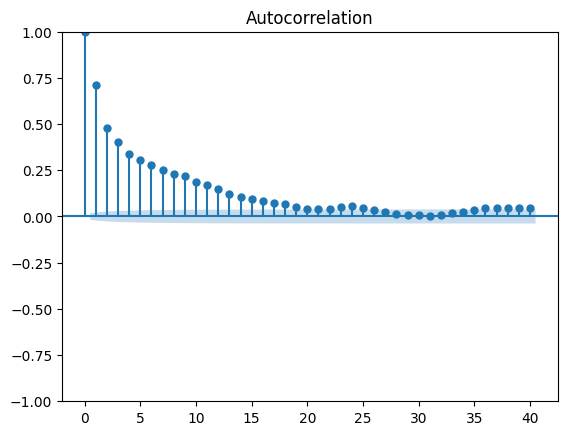

Résultats du test de Ljung-Box:
         lb_stat  lb_pvalue
10  14638.105284        0.0


In [9]:
y = Y_train_full

# Calcul de l'autocorrélation
autocorrelation = y['spot_id_delta'].autocorr()
print(f"Autocorrélation de 'spot_id_delta' avec elle-même: {autocorrelation}")

# Calcul et affichage de la fonction d'autocorrélation (ACF)
acf_values = sm.tsa.acf(y['spot_id_delta'], nlags=40)
print("Valeurs de la fonction d'autocorrélation (ACF):")
print(acf_values)

# Tracé de la fonction d'autocorrélation
plot_acf(y['spot_id_delta'], lags=40)
plt.show()

# Test de Ljung-Box pour vérifier l'autocorrélation
ljung_box_test = sm.stats.acorr_ljungbox(y['spot_id_delta'], lags=[10], return_df=True)
print("Résultats du test de Ljung-Box:")
print(ljung_box_test)

## Nos X

In [10]:
X_test_full.head()

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN


In [11]:
print(X_train_full.describe())


       load_forecast  coal_power_available  gas_power_available  \
count    9318.000000          10604.000000         10604.000000   
mean    53725.132968           2819.781592         11463.220671   
std     11274.194929            495.103588           483.799154   
min     30515.000000           1646.000000          9769.000000   
25%     45336.500000           2226.000000         11140.000000   
50%     51846.000000           2806.000000         11487.000000   
75%     62091.750000           3386.000000         11945.000000   
max     85145.000000           3391.000000         11963.000000   

       nuclear_power_available  wind_power_forecasts_average  \
count             10604.000000                  10581.000000   
mean              35393.282252                   4512.989415   
std                7619.820162                   3349.419356   
min               22285.000000                    592.000000   
25%               29005.000000                   2036.000000   
50%         

In [12]:
print(X_train_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  9318 non-null   float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10581 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10581 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
dtypes: float64(9), object(1)
memory usage: 828.6+ KB
None


In [13]:
# load_forecast: Prévision de charge électrique (12% manquantes)
# coal_power_available: Capacité disponible des centrales à charbon
# gas_power_available: Capacité disponible des centrales à gaz
# nuclear_power_available: Capacité disponible des centrales nucléaires
#A noter ques coal, gas et nuclear sont en données journalières !!
# wind_power_forecasts_average: Prévision moyenne de production éolienne
# solar_power_forecasts_average: Prévision moyenne de production solaire (manquantes la nuit ~100% entre 23h-4h)
# wind_power_forecasts_std: Écart-type des prévisions de production éolienne
# solar_power_forecasts_std: Écart-type des prévisions de production solaire (manque quand solar_average manque)
# predicted_spot_price: Prix spot prévu (82% manquantes - probablement la variable à prédire)
#
# Note: Les valeurs manquantes pour solar_ s'expliquent par l'absence de production solaire la nuit. --> Pour ces colonnes, pas d'imputation prévu, mais il y a des Nan su run jour

## Traitement des varaibles manquantes

### load_forcast imputation

In [14]:
# Charger les données
print("Chargement des données...")
df = pd.read_csv('datas/X_train.csv')

df['hour'] = df['DELIVERY_START'].astype(str).str.extract(r'(\d{2}):\d{2}:\d{2}').astype(int)



missing_mask = df['load_forecast'].isna()
print(f"Nombre de valeurs manquantes dans load_forecast: {missing_mask.sum()} sur {len(df)}")

# Créer un ensemble de test en masquant 10% des valeurs connues pour évaluation
df_complete = df[~missing_mask].copy()
np.random.seed(42)
n_samples = len(df_complete)
n_missing_test = int(n_samples * 0.1)
test_indices = np.random.choice(df_complete.index, n_missing_test, replace=False)

df_eval = df_complete.copy()
true_values = df_eval.loc[test_indices, 'load_forecast'].copy()
df_eval.loc[test_indices, 'load_forecast'] = np.nan

# Liste pour stocker les résultats
results = []

# Fonction pour évaluer l'imputation
def evaluate_method(imputed_values, true_values, method_name):
    mae = mean_absolute_error(true_values, imputed_values)
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    mape = np.mean(np.abs((true_values - imputed_values) / true_values)) * 100

    print(f"\n{method_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return {'method': method_name, 'mae': mae, 'rmse': rmse, 'mape': mape}

Chargement des données...
Nombre de valeurs manquantes dans load_forecast: 1287 sur 10605


In [15]:
# 1. Imputation par la moyenne globale
df_mean = df_eval.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['load_forecast'] = mean_imputer.fit_transform(df_mean[['load_forecast']])
imputed_values = df_mean.loc[test_indices, 'load_forecast']
results.append(evaluate_method(imputed_values, true_values, "Moyenne globale"))

# 2. Imputation par la médiane globale
df_median = df_eval.copy()
median_imputer = SimpleImputer(strategy='median')
df_median['load_forecast'] = median_imputer.fit_transform(df_median[['load_forecast']])
imputed_values = df_median.loc[test_indices, 'load_forecast']
results.append(evaluate_method(imputed_values, true_values, "Médiane globale"))

# 3. Imputation par la moyenne par heure
print("\nTest de l'imputation par moyenne par heure...")
df_hour_mean = df_eval.copy()
hour_means = df_complete.groupby('hour')['load_forecast'].mean()
for hour, mean_value in hour_means.items():
    hour_missing = (df_hour_mean['hour'] == hour) & df_hour_mean['load_forecast'].isna()
    df_hour_mean.loc[hour_missing, 'load_forecast'] = mean_value
imputed_values = df_hour_mean.loc[test_indices, 'load_forecast']
results.append(evaluate_method(imputed_values, true_values, "Moyenne par heure"))

# 4. Imputation par la médiane par heure
print("\nTest de l'imputation par médiane par heure...")
df_hour_median = df_eval.copy()
hour_medians = df_complete.groupby('hour')['load_forecast'].median()
for hour, median_value in hour_medians.items():
    hour_missing = (df_hour_median['hour'] == hour) & df_hour_median['load_forecast'].isna()
    df_hour_median.loc[hour_missing, 'load_forecast'] = median_value
imputed_values = df_hour_median.loc[test_indices, 'load_forecast']
results.append(evaluate_method(imputed_values, true_values, "Médiane par heure"))


Moyenne globale:
MAE: 9051.48
RMSE: 10982.29
MAPE: 17.24%

Médiane globale:
MAE: 8979.44
RMSE: 11194.59
MAPE: 16.51%

Test de l'imputation par moyenne par heure...

Moyenne par heure:
MAE: 8963.10
RMSE: 10555.74
MAPE: 16.92%

Test de l'imputation par médiane par heure...

Médiane par heure:
MAE: 8859.52
RMSE: 10784.56
MAPE: 16.14%


In [16]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mae')
print(results_df)

best_method = results_df.iloc[0]['method']

df_imputed = df.copy()

if best_method == "Moyenne globale":
    mean_value = df_complete['load_forecast'].mean()
    df_imputed.loc[missing_mask, 'load_forecast'] = mean_value
    print(f"Imputation avec la valeur moyenne globale: {mean_value:.2f}")

elif best_method == "Médiane globale":
    median_value = df_complete['load_forecast'].median()
    df_imputed.loc[missing_mask, 'load_forecast'] = median_value
    print(f"Imputation avec la valeur médiane globale: {median_value:.2f}")

elif best_method == "Moyenne par heure":
    for hour, mean_value in hour_means.items():
        hour_missing = (df_imputed['hour'] == hour) & missing_mask
        df_imputed.loc[hour_missing, 'load_forecast'] = mean_value
        print(f"Imputation pour heure {hour}: {mean_value:.2f} (pour {hour_missing.sum()} valeurs)")

elif best_method == "Médiane par heure":
    for hour, median_value in hour_medians.items():
        hour_missing = (df_imputed['hour'] == hour) & missing_mask
        df_imputed.loc[hour_missing, 'load_forecast'] = median_value
        print(f"Imputation pour heure {hour}: {median_value:.2f} (pour {hour_missing.sum()} valeurs)")

              method          mae          rmse       mape
3  Médiane par heure  8859.518797  10784.560799  16.143963
2  Moyenne par heure  8963.099652  10555.739393  16.916616
1    Médiane globale  8979.439313  11194.588637  16.511510
0    Moyenne globale  9051.484467  10982.289232  17.240071
Imputation pour heure 0: 50314.00 (pour 54 valeurs)
Imputation pour heure 1: 48909.50 (pour 54 valeurs)
Imputation pour heure 2: 48346.00 (pour 54 valeurs)
Imputation pour heure 3: 46014.00 (pour 54 valeurs)
Imputation pour heure 4: 45055.00 (pour 54 valeurs)
Imputation pour heure 5: 45659.00 (pour 54 valeurs)
Imputation pour heure 6: 49414.00 (pour 54 valeurs)
Imputation pour heure 7: 52404.00 (pour 54 valeurs)
Imputation pour heure 8: 54396.00 (pour 54 valeurs)
Imputation pour heure 9: 55503.50 (pour 54 valeurs)
Imputation pour heure 10: 55728.50 (pour 54 valeurs)
Imputation pour heure 11: 56056.00 (pour 54 valeurs)
Imputation pour heure 12: 55915.50 (pour 54 valeurs)
Imputation pour heure 13: 

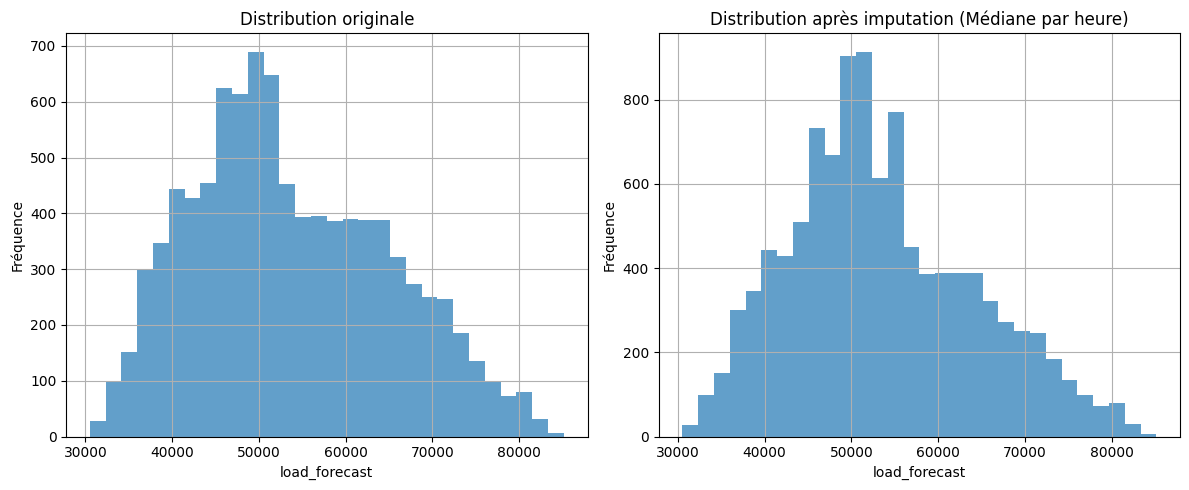

In [17]:
# Visualiser les distributions avant/après imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df[~missing_mask]['load_forecast'].hist(bins=30, alpha=0.7)
plt.title("Distribution originale")
plt.xlabel("load_forecast")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
df_imputed['load_forecast'].hist(bins=30, alpha=0.7)
plt.title(f"Distribution après imputation ({best_method})")
plt.xlabel("load_forecast")
plt.ylabel("Fréquence")

plt.tight_layout()

### wind_power_forecasts_average

Corrélation globale : 0.995048111685808
Corrélation locale originale : 0.9825621729411802

Comparaison des corrélations :
Corrélation globale - Originale : 0.995048111685808
Corrélation locale - Originale  : 0.9825621729411802


C:\Users\Enzo\AppData\Local\Temp\ipykernel_31652\423001027.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_linear['wind_power_forecasts_average'] = df_linear['wind_power_forecasts_average'].fillna(method='ffill').fillna(method='bfill')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_31652\423001027.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cubic['wind_power_forecasts_average'] = df_cubic['wind_power_forecasts_average'].fillna(method='ffill').fillna(method='bfill')


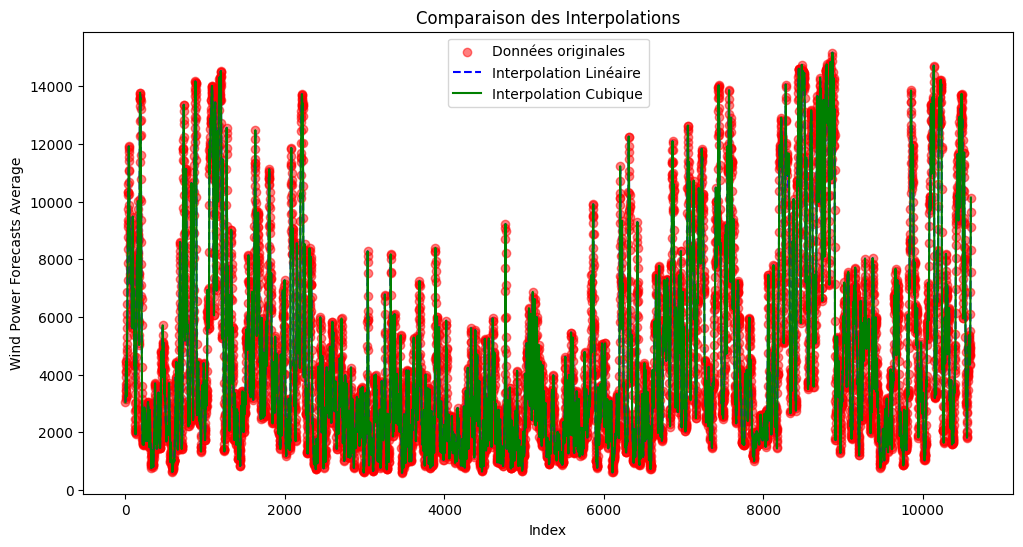

In [18]:
df_sorted = df_imputed.sort_values('DELIVERY_START')

# On s'assure de travailler sur la série sans NaN pour le calcul global
serie_complete = df_sorted['wind_power_forecasts_average'].dropna()

# Calculer la corrélation globale entre chaque point et son suivant
global_corr = np.corrcoef(serie_complete[:-1], serie_complete[1:])[0, 1]
print("Corrélation globale :", global_corr)

# Fonction pour calculer la corrélation locale (entre t-1 et t+1)
def calculate_local_correlation(data):
    # On utilise uniquement les indices où t-1 et t+1 existent
    x_vals = []
    y_vals = []
    for i in range(1, len(data) - 1):
        x_vals.append(data.iloc[i-1])
        y_vals.append(data.iloc[i+1])
    return np.corrcoef(x_vals, y_vals)[0, 1]

# Calculer la corrélation locale avant interpolation
local_corr_originale = calculate_local_correlation(serie_complete)
print("Corrélation locale originale :", local_corr_originale)

# Créer des copies pour les interpolations
df_linear = df_sorted.copy()
df_cubic = df_sorted.copy()

# Interpolation linéaire
df_linear['wind_power_forecasts_average'] = df_linear['wind_power_forecasts_average'].interpolate(method='linear')
df_linear['wind_power_forecasts_average'] = df_linear['wind_power_forecasts_average'].fillna(method='ffill').fillna(method='bfill')

# Interpolation cubique
df_cubic['wind_power_forecasts_average'] = df_cubic['wind_power_forecasts_average'].interpolate(method='cubic')
df_cubic['wind_power_forecasts_average'] = df_cubic['wind_power_forecasts_average'].fillna(method='ffill').fillna(method='bfill')

# Pour le calcul, recréer les séries sans NaN
serie_linear = df_linear['wind_power_forecasts_average']
serie_cubic = df_cubic['wind_power_forecasts_average']

# Calculer la corrélation globale après interpolation
global_corr_linear = np.corrcoef(serie_linear[:-1], serie_linear[1:])[0, 1]
global_corr_cubic  = np.corrcoef(serie_cubic[:-1], serie_cubic[1:])[0, 1]

# Calculer la corrélation locale après interpolation
local_corr_linear = calculate_local_correlation(serie_linear)
local_corr_cubic  = calculate_local_correlation(serie_cubic)

# Comparaison des corrélations
print("\nComparaison des corrélations :")
print(f"Corrélation globale - Originale : {global_corr}")
print(f"Corrélation locale - Originale  : {local_corr_originale}")

# Ajout des valeurs imputées (ici issues de l'interpolation linéaire) dans df_imputed
df_imputed['wind_power_forecasts_average'] = df_linear['wind_power_forecasts_average']

# Visualisation des interpolations
plt.figure(figsize=(12,6))

# Données originales (avec NaN éventuellement)
plt.scatter(df_sorted.index, df_sorted['wind_power_forecasts_average'],
            label='Données originales', color='red', alpha=0.5)

# Interpolation linéaire
plt.plot(df_sorted.index, df_linear['wind_power_forecasts_average'],
         label='Interpolation Linéaire', color='blue', linestyle='--')

# Interpolation cubique
plt.plot(df_sorted.index, df_cubic['wind_power_forecasts_average'],
         label='Interpolation Cubique', color='green', linestyle='-')

plt.title('Comparaison des Interpolations')
plt.xlabel('Index')
plt.ylabel('Wind Power Forecasts Average')
plt.legend()
plt.show()


In [19]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  10605 non-null  float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10605 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10581 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
 10  hour                           10605 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 911.5+ KB


### wind_power_forecasts_std

Corrélation globale : 0.8938859075237389
Corrélation locale originale : 0.7540894338802259

Comparaison des corrélations :
Corrélation globale - Originale : 0.8938859075237389
Corrélation globale - Linéaire  : 0.8940336795110009
Corrélation globale - Cubique   : 0.8940852100177725
Corrélation locale - Originale  : 0.7540894338802259
Corrélation locale - Linéaire   : 0.7543930575469676
Corrélation locale - Cubique    : 0.7544909213705099


C:\Users\Enzo\AppData\Local\Temp\ipykernel_31652\1411760676.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_linear['wind_power_forecasts_std'] = df_linear['wind_power_forecasts_std'].fillna(method='ffill').fillna(method='bfill')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_31652\1411760676.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cubic['wind_power_forecasts_std'] = df_cubic['wind_power_forecasts_std'].fillna(method='ffill').fillna(method='bfill')


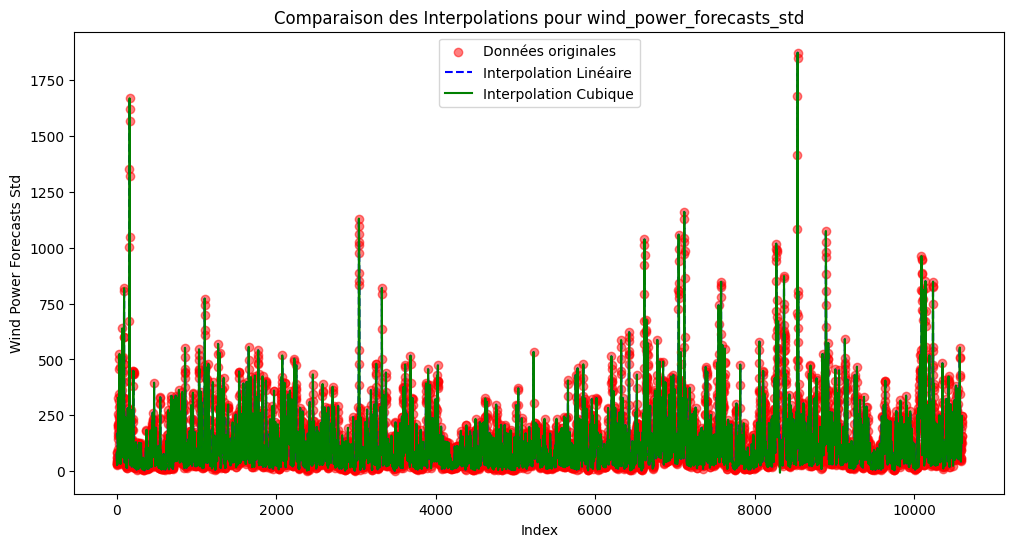

In [20]:
df_sorted = df_imputed.sort_values('DELIVERY_START')

# On s'assure de travailler sur la série sans NaN pour le calcul global
serie_complete = df_sorted['wind_power_forecasts_std'].dropna()

# Calculer la corrélation globale entre chaque point et son suivant
global_corr = np.corrcoef(serie_complete[:-1], serie_complete[1:])[0, 1]
print("Corrélation globale :", global_corr)


# Calculer la corrélation locale avant interpolation
local_corr_originale = calculate_local_correlation(serie_complete)
print("Corrélation locale originale :", local_corr_originale)

# Créer des copies pour les interpolations
df_linear = df_sorted.copy()
df_cubic = df_sorted.copy()

# Interpolation linéaire
df_linear['wind_power_forecasts_std'] = df_linear['wind_power_forecasts_std'].interpolate(method='linear')
df_linear['wind_power_forecasts_std'] = df_linear['wind_power_forecasts_std'].fillna(method='ffill').fillna(method='bfill')

# Interpolation cubique
df_cubic['wind_power_forecasts_std'] = df_cubic['wind_power_forecasts_std'].interpolate(method='cubic')
df_cubic['wind_power_forecasts_std'] = df_cubic['wind_power_forecasts_std'].fillna(method='ffill').fillna(method='bfill')

# Pour le calcul, recréer les séries sans NaN
serie_linear = df_linear['wind_power_forecasts_std']
serie_cubic = df_cubic['wind_power_forecasts_std']

# Calculer la corrélation globale après interpolation
global_corr_linear = np.corrcoef(serie_linear[:-1], serie_linear[1:])[0, 1]
global_corr_cubic  = np.corrcoef(serie_cubic[:-1], serie_cubic[1:])[0, 1]

# Calculer la corrélation locale après interpolation
local_corr_linear = calculate_local_correlation(serie_linear)
local_corr_cubic  = calculate_local_correlation(serie_cubic)

# Comparaison des corrélations
print("\nComparaison des corrélations :")
print(f"Corrélation globale - Originale : {global_corr}")
print(f"Corrélation globale - Linéaire  : {global_corr_linear}")
print(f"Corrélation globale - Cubique   : {global_corr_cubic}")
print(f"Corrélation locale - Originale  : {local_corr_originale}")
print(f"Corrélation locale - Linéaire   : {local_corr_linear}")
print(f"Corrélation locale - Cubique    : {local_corr_cubic}")

# Sélection de la méthode qui préserve le mieux la structure de corrélation
if abs(global_corr_linear - global_corr) < abs(global_corr_cubic - global_corr):
    df_imputed['wind_power_forecasts_std'] = df_linear['wind_power_forecasts_std']
else:
    df_imputed['wind_power_forecasts_std'] = df_cubic['wind_power_forecasts_std']

# Visualisation des interpolations
plt.figure(figsize=(12,6))

# Données originales (avec NaN éventuellement)
plt.scatter(df_sorted.index, df_sorted['wind_power_forecasts_std'],
            label='Données originales', color='red', alpha=0.5)

# Interpolation linéaire
plt.plot(df_sorted.index, df_linear['wind_power_forecasts_std'],
         label='Interpolation Linéaire', color='blue', linestyle='--')

# Interpolation cubique
plt.plot(df_sorted.index, df_cubic['wind_power_forecasts_std'],
         label='Interpolation Cubique', color='green', linestyle='-')

plt.title('Comparaison des Interpolations pour wind_power_forecasts_std')
plt.xlabel('Index')
plt.ylabel('Wind Power Forecasts Std')
plt.legend()
plt.show()

# Si besoin de sélectionner une plage spécifique pour mieux visualiser
# Sélection d'une plage où il y a des valeurs manquantes (à adapter selon vos données)
mask = df_sorted['wind_power_forecasts_std'].isna()
if mask.any():
    # Trouver un indice où il y a une valeur manquante
    idx_missing = df_sorted.index[mask].min()
    # Sélectionner une plage autour de cette valeur
    idx_start = max(0, df_sorted.index.get_loc(idx_missing) - 20)
    idx_end = min(len(df_sorted), df_sorted.index.get_loc(idx_missing) + 20)


In [21]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  10605 non-null  float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10605 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10605 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
 10  hour                           10605 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 911.5+ KB


### solar_power_forecasts_average

In [22]:
# Préparation du DataFrame
df_sorted = df_imputed.copy()
df_sorted['date_string'] = df_sorted['DELIVERY_START'].astype(str).str.split(' ').str[0]
df_sorted['hour'] = df_sorted['DELIVERY_START'].astype(str).str.split(' ').str[1].str.split(':').str[0].astype(int)

# Définir la date manquante et déterminer les dates de la veille et du lendemain
missing_date = '2023-02-20'
previous_date = (pd.to_datetime(missing_date) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')
next_date = (pd.to_datetime(missing_date) + pd.Timedelta(days=1)).strftime('%Y-%m-%d')

# Extraction des données pour la veille et le lendemain
prev_data = df_sorted[df_sorted['date_string'] == previous_date][['DELIVERY_START', 'solar_power_forecasts_average', 'hour']]
next_data = df_sorted[df_sorted['date_string'] == next_date][['DELIVERY_START', 'solar_power_forecasts_average', 'hour']]

# Création de dictionnaires de valeurs par heure (en excluant les NaN)
prev_values = {row['hour']: row['solar_power_forecasts_average']
               for _, row in prev_data.iterrows()
               if not pd.isna(row['solar_power_forecasts_average'])}
next_values = {row['hour']: row['solar_power_forecasts_average']
               for _, row in next_data.iterrows()
               if not pd.isna(row['solar_power_forecasts_average'])}

# Extraction des données de la date manquante
missing_data = df_sorted[df_sorted['date_string'] == missing_date][['DELIVERY_START', 'solar_power_forecasts_average', 'hour']]

# Copie du DataFrame pour l'imputation
df_output = df_sorted.copy()

# Imputation par interpolation linéaire : (valeur veille + valeur lendemain) / 2
for idx, row in missing_data.iterrows():
    if pd.isna(row['solar_power_forecasts_average']):
        hour = row['hour']
        if (hour in prev_values) and (hour in next_values):
            interpolated_value = (prev_values[hour] + next_values[hour]) / 2
            df_output.loc[idx, 'solar_power_forecasts_average'] = interpolated_value

# Ajout de la colonne imputée dans le DataFrame original
df_imputed['solar_power_forecasts_average'] = df_output['solar_power_forecasts_average']

# Nettoyage final du DataFrame (suppression des colonnes temporaires)
df_imputed = df_output.drop(['date_string'], axis=1).copy()


In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  10605 non-null  float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10605 non-null  float64
 6   solar_power_forecasts_average  10605 non-null  float64
 7   wind_power_forecasts_std       10605 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
 10  hour                           10605 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 911.5+ KB


### solar_power_forecasts_std

In [24]:
import pandas as pd
import numpy as np

df_sorted = df_imputed.copy()
df_sorted['date_string'] = df_sorted['DELIVERY_START'].astype(str).str.split(' ').str[0]
df_sorted['hour'] = df_sorted['DELIVERY_START'].astype(str).str.split(' ').str[1].str.split(':').str[0].astype(int)

# Définir la date manquante et déterminer les dates de la veille et du lendemain
missing_date = '2023-02-20'
previous_date = (pd.to_datetime(missing_date) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')
next_date = (pd.to_datetime(missing_date) + pd.Timedelta(days=1)).strftime('%Y-%m-%d')

# Extraire les données de la veille et du lendemain pour la variable solar_power_forecasts_std
prev_data = df_sorted[df_sorted['date_string'] == previous_date][['DELIVERY_START', 'solar_power_forecasts_std', 'hour']]
next_data = df_sorted[df_sorted['date_string'] == next_date][['DELIVERY_START', 'solar_power_forecasts_std', 'hour']]

# Créer des dictionnaires de valeurs par heure en excluant les valeurs manquantes
prev_values = {row['hour']: row['solar_power_forecasts_std']
               for _, row in prev_data.iterrows()
               if not pd.isna(row['solar_power_forecasts_std'])}
next_values = {row['hour']: row['solar_power_forecasts_std']
               for _, row in next_data.iterrows()
               if not pd.isna(row['solar_power_forecasts_std'])}

# Extraire les données de la date manquante
missing_data = df_sorted[df_sorted['date_string'] == missing_date][['DELIVERY_START', 'solar_power_forecasts_std', 'hour']]

# Copier le DataFrame pour l'imputation
df_output = df_sorted.copy()

# Imputation par interpolation linéaire : (valeur veille + valeur lendemain) / 2
for idx, row in missing_data.iterrows():
    if pd.isna(row['solar_power_forecasts_std']):
        hour = row['hour']
        if hour in prev_values and hour in next_values:
            interpolated_value = (prev_values[hour] + next_values[hour]) / 2
            df_output.loc[idx, 'solar_power_forecasts_std'] = interpolated_value

# Ajouter la colonne imputée dans le DataFrame original
df_imputed['solar_power_forecasts_std'] = df_output['solar_power_forecasts_std']

# Nettoyer le DataFrame en retirant les colonnes temporaires
df_imputed = df_output.drop(['date_string', 'hour'], axis=1).copy()


In [25]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  10605 non-null  float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10605 non-null  float64
 6   solar_power_forecasts_average  10605 non-null  float64
 7   wind_power_forecasts_std       10605 non-null  float64
 8   solar_power_forecasts_std      10605 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
dtypes: float64(9), object(1)
memory usage: 828.6+ KB


### coal_power_available/gas_power_available/nuclear_power_available

In [26]:
columns_to_ffill = ['coal_power_available', 'gas_power_available', 'nuclear_power_available']

# Remplir les valeurs manquantes par la valeur précédente
df_imputed[columns_to_ffill] = df_imputed[columns_to_ffill].ffill()

In [27]:
#TODO
#windsoriser les valeurs à 2.5% up/down
#tout normaliser je pense

## Ajout de variables

### Ajout d'une variable saisonnière

In [28]:
df_imputed['DELIVERY_START'] = pd.to_datetime(df_imputed['DELIVERY_START'], utc=True)
df_imputed['season'] = df_imputed['DELIVERY_START'].dt.month.apply(lambda x: 'winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall')

# One-hot encoding de la variable 'season'
df_imputed['season_winter'] = df_imputed['season'].apply(lambda x: 1 if x == 'winter' else 0)
df_imputed['season_spring'] = df_imputed['season'].apply(lambda x: 1 if x == 'spring' else 0)
df_imputed['season_summer'] = df_imputed['season'].apply(lambda x: 1 if x == 'summer' else 0)
df_imputed['season_fall'] = df_imputed['season'].apply(lambda x: 1 if x == 'fall' else 0)
df_imputed.drop('season', axis=1, inplace=True)

### Ajout d'une varible week-end

In [29]:
df_imputed['is_weekend'] = df_imputed['DELIVERY_START'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)

### Ajout d'une variable jour/nuit

In [30]:
df_imputed['is_day'] = df_imputed['DELIVERY_START'].dt.hour.apply(lambda x: 1 if 8 <= x <= 20 else 0)

### Ratios pour chaque énergies

In [31]:
df_imputed['solar_ratio'] = df_imputed['solar_power_forecasts_average'] / df_imputed['load_forecast']
df_imputed['wind_ratio'] = df_imputed['wind_power_forecasts_average'] / df_imputed['load_forecast']
df_imputed['coal_ratio'] = df_imputed['coal_power_available'] / df_imputed['load_forecast']
df_imputed['gas_ratio'] = df_imputed['gas_power_available'] / df_imputed['load_forecast']
df_imputed['nuclear_ratio'] = df_imputed['nuclear_power_available'] / df_imputed['load_forecast']

### Ratio fossile/non-fossile + contrôle/non-contrôlable

In [32]:
df_imputed['fossil_ratio'] = (df_imputed['coal_power_available'] + df_imputed['gas_power_available']) / df_imputed['load_forecast']
df_imputed['green_ratio'] = (df_imputed['wind_power_forecasts_average'] + df_imputed['solar_power_forecasts_average']) / df_imputed['load_forecast']
df_imputed['nuclear_ratio'] = df_imputed['nuclear_power_available'] / df_imputed['load_forecast']
df_imputed['controlable_ratio'] = (df_imputed['coal_power_available'] + df_imputed['gas_power_available'] + df_imputed['nuclear_power_available']) / df_imputed['load_forecast']

### Demande-Offre

In [33]:
df_imputed['all_offer'] = df_imputed['coal_power_available'] + df_imputed['gas_power_available'] + df_imputed['nuclear_power_available'] + df_imputed['wind_power_forecasts_average'] + df_imputed['solar_power_forecasts_average']
df_imputed['offer_minus_load'] = df_imputed['all_offer'] - df_imputed['load_forecast']

In [34]:
# df_imputed = df_imputed.drop('predicted_spot_price', axis= 1)
# df_imputed.to_csv("df_imputed.csv", index=False, sep="'")
# df_imputed.to_excel("df_imputed.xlsx", index=False)